In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

1.9.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
    num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [3]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


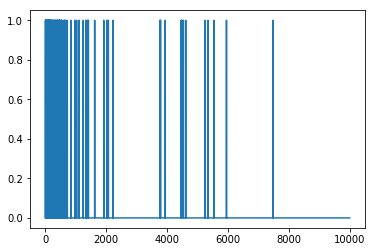

In [4]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [5]:
def create_model(nuerons=16, k_reg=None, Dropout=False, drop_rate=0.2):
    # Create base model
    model = keras.Sequential()
    # Add first layer and dropout
    model.add(keras.layers.Dense(nuerons,
                                 kernel_regularizer=k_reg,
                                 activation=tf.nn.relu, input_shape=(NUM_WORDS,)))
    if Dropout: model.add(keras.layers.Dropout(drop_rate))
    # Add second layer and dropout
    model.add(keras.layers.Dense(nuerons,
                                 kernel_regularizer=k_reg,
                                 activation=tf.nn.relu))
    if Dropout: model.add(keras.layers.Dropout(drop_rate))
    # add final output layer 
    model.add(keras.layers.Dense(1, 
                                 activation=tf.nn.sigmoid))
    # compile
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
    return model
    
    

In [6]:
baseline_model = create_model(16)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=15,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 8s - loss: 0.4928 - acc: 0.8116 - binary_crossentropy: 0.4928 - val_loss: 0.3473 - val_acc: 0.8720 - val_binary_crossentropy: 0.3473
Epoch 2/15
 - 6s - loss: 0.2556 - acc: 0.9090 - binary_crossentropy: 0.2556 - val_loss: 0.2842 - val_acc: 0.8875 - val_binary_crossentropy: 0.2842
Epoch 3/15
 - 7s - loss: 0.1860 - acc: 0.9343 - binary_crossentropy: 0.1860 - val_loss: 0.2880 - val_acc: 0.8859 - val_binary_crossentropy: 0.2880
Epoch 4/15
 - 6s - loss: 0.1481 - acc: 0.9490 - binary_crossentropy: 0.1481 - val_loss: 0.3115 - val_acc: 0.8795 - val_binary_crossentropy: 0.3115
Epoch 5/15
 - 6s - loss: 0.1225 - acc: 0.9591 - binary_crossentropy: 0.1225 - val_loss: 0.3390 - val_acc: 0.8741 - val_binary_crossentropy: 0.3390
Epoch 6/15
 - 6s - loss: 0.1016 - acc: 0.9682 - binary_crossentropy: 0.1016 - val_loss: 0.3696 - val_acc: 0.8703 - val_binary_crossentropy: 0.3696
Epoch 7/15
 - 6s - loss: 0.0840 - acc: 0.9752 - binary_crossentropy:

In [8]:
smaller_model = create_model(4)
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=15,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 9s - loss: 0.6214 - acc: 0.6690 - binary_crossentropy: 0.6214 - val_loss: 0.5333 - val_acc: 0.7979 - val_binary_crossentropy: 0.5333
Epoch 2/15
 - 8s - loss: 0.4233 - acc: 0.8826 - binary_crossentropy: 0.4233 - val_loss: 0.3766 - val_acc: 0.8803 - val_binary_crossentropy: 0.3766
Epoch 3/15
 - 7s - loss: 0.2956 - acc: 0.9132 - binary_crossentropy: 0.2956 - val_loss: 0.3134 - val_acc: 0.8868 - val_binary_crossentropy: 0.3134
Epoch 4/15
 - 6s - loss: 0.2337 - acc: 0.9278 - binary_crossentropy: 0.2337 - val_loss: 0.2899 - val_acc: 0.8894 - val_binary_crossentropy: 0.2899
Epoch 5/15
 - 6s - loss: 0.1982 - acc: 0.9356 - binary_crossentropy: 0.1982 - val_loss: 0.2872 - val_acc: 0.8850 - val_binary_crossentropy: 0.2872
Epoch 6/15
 - 6s - loss: 0.1733 - acc: 0.9436 - binary_crossentropy: 0.1733 - val_loss: 0.2839 - val_acc: 0.8873 - val_binary_crossentropy: 0.2839
Epoch 7/15
 - 7s - loss: 0.1545 - acc: 0.9498 - binary_crossentropy:

In [10]:
bigger_model = create_model(128)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=15,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 12s - loss: 0.3662 - acc: 0.8468 - binary_crossentropy: 0.3662 - val_loss: 0.2884 - val_acc: 0.8843 - val_binary_crossentropy: 0.2884
Epoch 2/15
 - 11s - loss: 0.1786 - acc: 0.9344 - binary_crossentropy: 0.1786 - val_loss: 0.3293 - val_acc: 0.8742 - val_binary_crossentropy: 0.3293
Epoch 3/15
 - 11s - loss: 0.1187 - acc: 0.9592 - binary_crossentropy: 0.1187 - val_loss: 0.3835 - val_acc: 0.8681 - val_binary_crossentropy: 0.3835
Epoch 4/15
 - 11s - loss: 0.0700 - acc: 0.9775 - binary_crossentropy: 0.0700 - val_loss: 0.4746 - val_acc: 0.8634 - val_binary_crossentropy: 0.4746
Epoch 5/15
 - 12s - loss: 0.0330 - acc: 0.9915 - binary_crossentropy: 0.0330 - val_loss: 0.5532 - val_acc: 0.8624 - val_binary_crossentropy: 0.5532
Epoch 6/15
 - 11s - loss: 0.0129 - acc: 0.9979 - binary_crossentropy: 0.0129 - val_loss: 0.6356 - val_acc: 0.8605 - val_binary_crossentropy: 0.6356
Epoch 7/15
 - 11s - loss: 0.0045 - acc: 0.9998 - binary_crosse

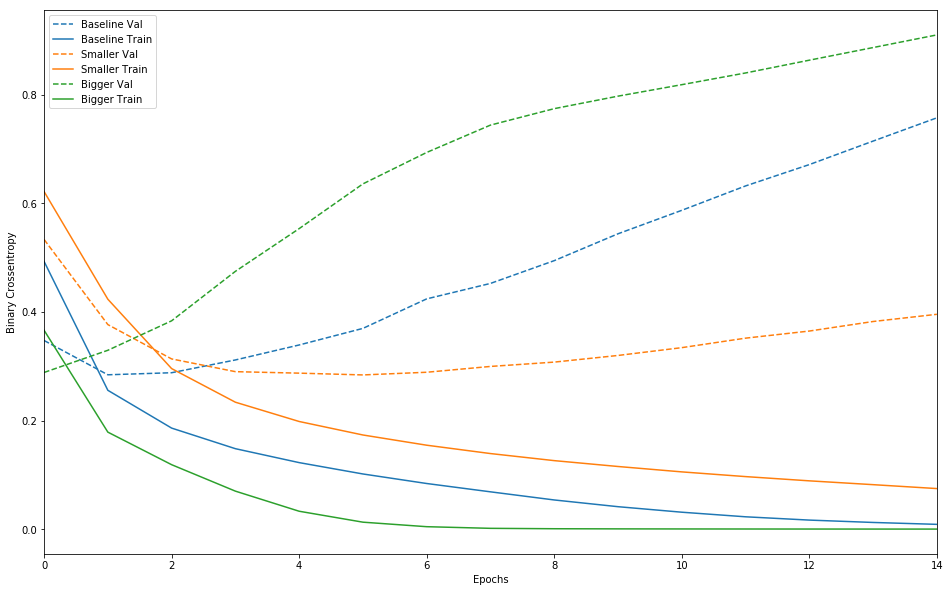

In [22]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_'+key],
                       '--',
                       label=name.title()+' Val')
        plt.plot(history.epoch,
                 history.history[key], 
                 color=val[0].get_color(), 
                 label=name.title()+' Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])
        
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)
])

In [13]:
l2_model = create_model(nuerons=16,
                        k_reg=keras.regularizers.l2(0.001))

In [14]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=15,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 7s - loss: 0.5216 - acc: 0.7986 - binary_crossentropy: 0.4804 - val_loss: 0.3734 - val_acc: 0.8750 - val_binary_crossentropy: 0.3306
Epoch 2/15
 - 6s - loss: 0.2956 - acc: 0.9106 - binary_crossentropy: 0.2490 - val_loss: 0.3327 - val_acc: 0.8874 - val_binary_crossentropy: 0.2833
Epoch 3/15
 - 6s - loss: 0.2450 - acc: 0.9320 - binary_crossentropy: 0.1931 - val_loss: 0.3393 - val_acc: 0.8854 - val_binary_crossentropy: 0.2855
Epoch 4/15
 - 6s - loss: 0.2236 - acc: 0.9409 - binary_crossentropy: 0.1680 - val_loss: 0.3624 - val_acc: 0.8788 - val_binary_crossentropy: 0.3055
Epoch 5/15
 - 6s - loss: 0.2094 - acc: 0.9481 - binary_crossentropy: 0.1509 - val_loss: 0.3713 - val_acc: 0.8760 - val_binary_crossentropy: 0.3119
Epoch 6/15
 - 6s - loss: 0.1968 - acc: 0.9535 - binary_crossentropy: 0.1369 - val_loss: 0.3879 - val_acc: 0.8738 - val_binary_crossentropy: 0.3272
Epoch 7/15
 - 6s - loss: 0.1894 - acc: 0.9582 - binary_crossentropy:

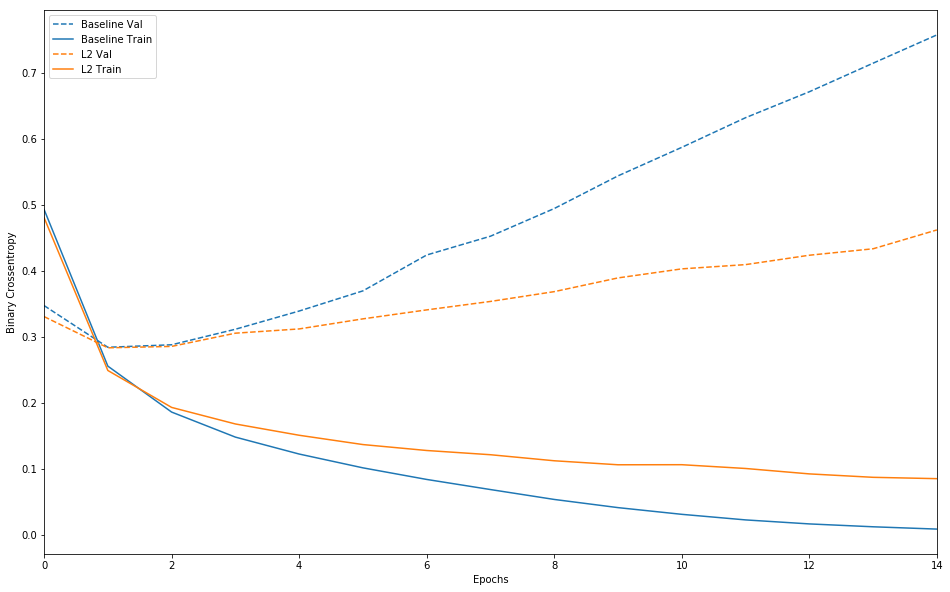

In [23]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
dpt_model = create_model(Dropout=True, drop_rate=0.5)

In [17]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=15,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 7s - loss: 0.6378 - acc: 0.6249 - binary_crossentropy: 0.6378 - val_loss: 0.5192 - val_acc: 0.8482 - val_binary_crossentropy: 0.5192
Epoch 2/15
 - 6s - loss: 0.4779 - acc: 0.7830 - binary_crossentropy: 0.4779 - val_loss: 0.3654 - val_acc: 0.8781 - val_binary_crossentropy: 0.3654
Epoch 3/15
 - 6s - loss: 0.3671 - acc: 0.8497 - binary_crossentropy: 0.3671 - val_loss: 0.2972 - val_acc: 0.8865 - val_binary_crossentropy: 0.2972
Epoch 4/15
 - 6s - loss: 0.3035 - acc: 0.8872 - binary_crossentropy: 0.3035 - val_loss: 0.2763 - val_acc: 0.8893 - val_binary_crossentropy: 0.2763
Epoch 5/15
 - 6s - loss: 0.2551 - acc: 0.9086 - binary_crossentropy: 0.2551 - val_loss: 0.2772 - val_acc: 0.8870 - val_binary_crossentropy: 0.2772
Epoch 6/15
 - 6s - loss: 0.2240 - acc: 0.9214 - binary_crossentropy: 0.2240 - val_loss: 0.2832 - val_acc: 0.8856 - val_binary_crossentropy: 0.2832
Epoch 7/15
 - 6s - loss: 0.1992 - acc: 0.9321 - binary_crossentropy:

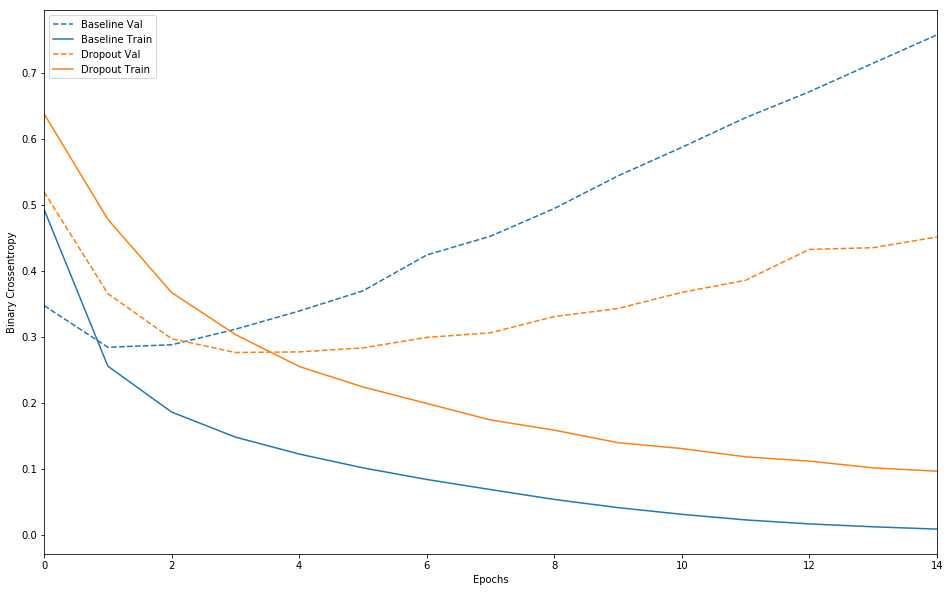

In [24]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [19]:
dpt_l2_model = create_model(Dropout=True, drop_rate=0.5, 
                            k_reg=keras.regularizers.l2(0.001))

In [20]:
dpt_l2_model_history = dpt_l2_model.fit(train_data, train_labels,
                                  epochs=15,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 - 7s - loss: 0.6671 - acc: 0.6293 - binary_crossentropy: 0.6318 - val_loss: 0.5310 - val_acc: 0.8526 - val_binary_crossentropy: 0.4976
Epoch 2/15
 - 6s - loss: 0.5024 - acc: 0.8090 - binary_crossentropy: 0.4675 - val_loss: 0.4048 - val_acc: 0.8808 - val_binary_crossentropy: 0.3680
Epoch 3/15
 - 6s - loss: 0.4166 - acc: 0.8706 - binary_crossentropy: 0.3775 - val_loss: 0.3563 - val_acc: 0.8858 - val_binary_crossentropy: 0.3146
Epoch 4/15
 - 6s - loss: 0.3643 - acc: 0.8969 - binary_crossentropy: 0.3198 - val_loss: 0.3388 - val_acc: 0.8871 - val_binary_crossentropy: 0.2916
Epoch 5/15
 - 6s - loss: 0.3297 - acc: 0.9118 - binary_crossentropy: 0.2798 - val_loss: 0.3359 - val_acc: 0.8847 - val_binary_crossentropy: 0.2833
Epoch 6/15
 - 6s - loss: 0.3015 - acc: 0.9208 - binary_crossentropy: 0.2464 - val_loss: 0.3455 - val_acc: 0.8848 - val_binary_crossentropy: 0.2877
Epoch 7/15
 - 6s - loss: 0.2824 - acc: 0.9286 - binary_crossentropy:

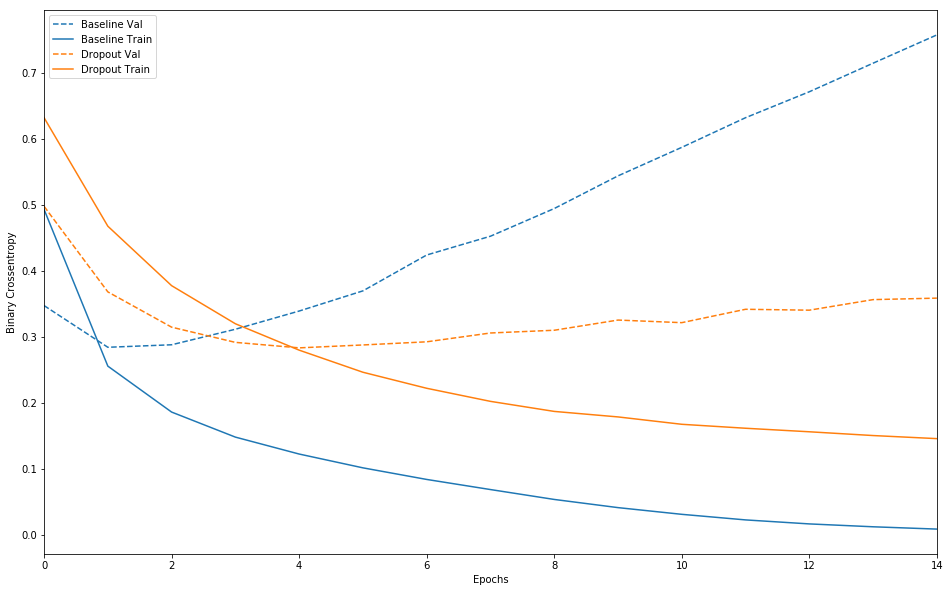

In [25]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_l2_model_history)])

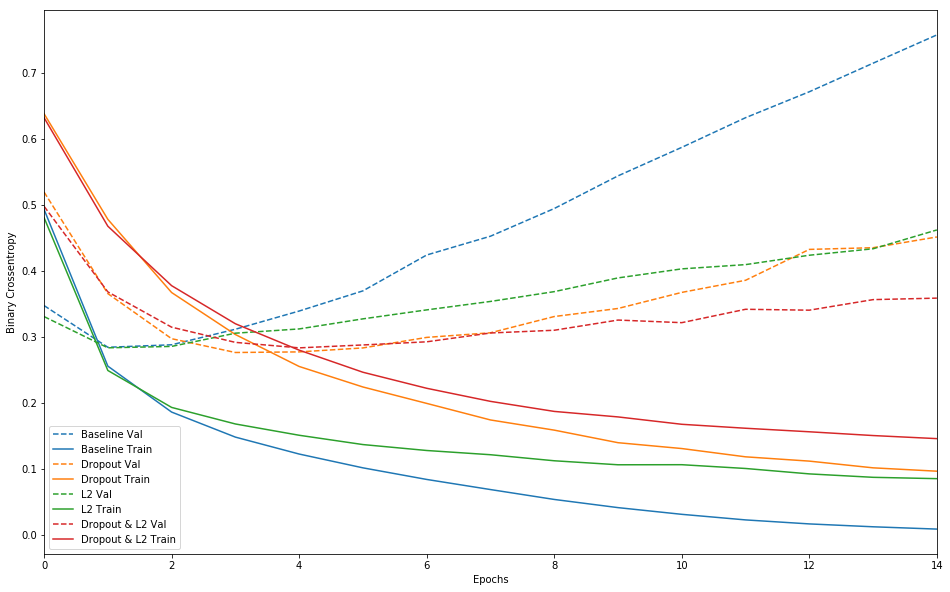

In [26]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history),
              ('l2', l2_model_history),
              ('dropout & l2', dpt_l2_model_history)
             ])